# **REQUIRED LIBRARIES**

In [14]:
# Required libraries
!pip install scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.measure import block_reduce
from scipy.fft import fft

import matplotlib.pyplot as plt

%matplotlib inline  

# LOADING DATA AND PLOT SIGNALS

There are two separate ECGs which are in the frequency of 125 and 800, respectively

[ -61. -106. -143. ...  -78.  -79.  -82.]
[2350. 2423. 2375. ... 6388. 6455. 6426.]
################################################################################################################################################
################################################################################################################################################


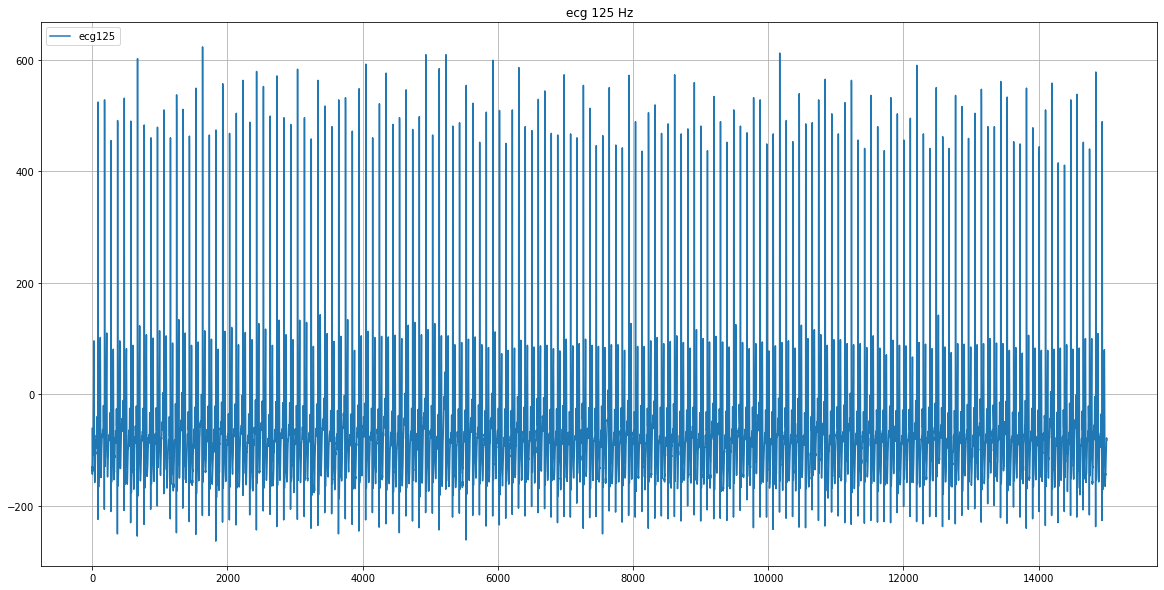

################################################################################################################################################
################################################################################################################################################


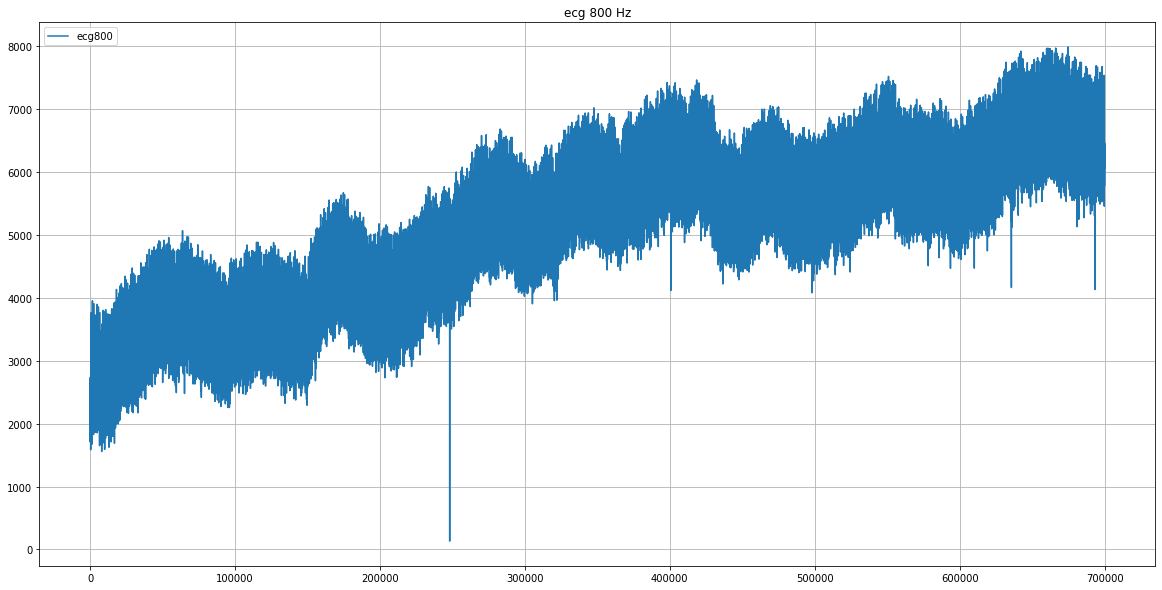

In [15]:
# Importing datasets and convert to Numpy array.
matfile_125 = sio.loadmat('/content/drive/MyDrive/ecg_exercise/ECG_125.mat')
matfile_800 = sio.loadmat('/content/drive/MyDrive/ecg_exercise/ECG_800.mat')
my_ecg_125 = np.array(*matfile_125['ecg'])
my_ecg_800 = np.array(*matfile_800['ecg'])

my_ecg_125 = my_ecg_125.astype('float64')
print(my_ecg_125)
my_ecg_800 = my_ecg_800.astype('float64')
print(my_ecg_800)
print('################################################################################################################################################')
print('################################################################################################################################################')
plt.figure(figsize=(20,10))
plt.plot(my_ecg_125)
plt.legend(('ecg125', ' '), loc='upper left')
plt.title("ecg 125 Hz")
plt.grid(True)
plt.show()
print('################################################################################################################################################')
print('################################################################################################################################################')
plt.figure(figsize=(20,10))
plt.plot(my_ecg_800)
plt.legend(('ecg800', ' '), loc='upper left')
plt.title("ecg 800 Hz")
plt.grid(True)
plt.show()

# **All Three tasks for  ECG 125 Hz**

RESAMPLING

Since there are two separate ECG data by 125 and 800 Hz, respectively, for resampling to 200 Hz, we have to use downsampling and upsampling, respectively.

################################################################################################################################################
################################################################################################################################################
[ -61.  -106.   -83.5 ...  -79.   -80.   -79.5]
24000
################################################################################################################################################
################################################################################################################################################


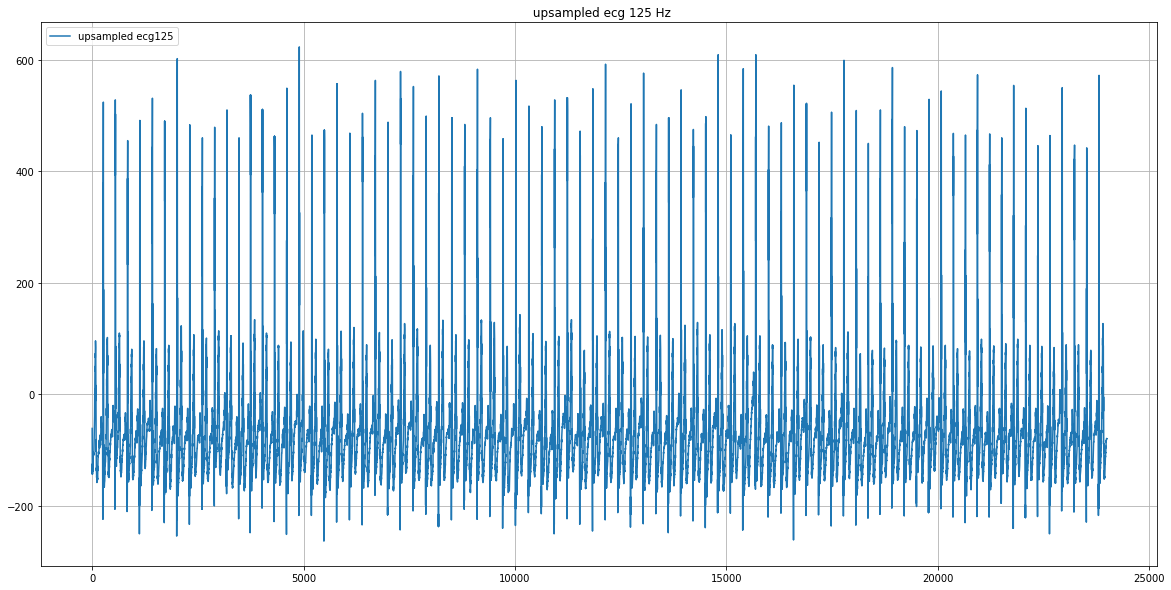

In [16]:
# 'samp' is equal to the number of required samples for receiving to 200 Hz frequency  
# I utilized an averaging technique to upsample the ECG from125 Hz to 200 Hz.  In the beginning, I averaged every two continuing samples and added both of them and their mean to a new list.
# Next, I continued the method until the length of the new list was equal to the required samples 

samp = 200*(len(my_ecg_125)//125)

L = []
resample_125 = []
for i in range(0,len(my_ecg_125)-1):
  L.append(my_ecg_125[i])
  L.append(my_ecg_125[i+1])
  L.append((my_ecg_125[i]+my_ecg_125[i+1])/2)
for i in range(samp):
  resample_125.append(L[i])
resample_125 = np.array(resample_125)

print('################################################################################################################################################')
print('################################################################################################################################################')
print(resample_125)
print(len(resample_125))
print('################################################################################################################################################')
print('################################################################################################################################################')
plt.figure(figsize=(20,10))
plt.plot(resample_125)
plt.legend(('upsampled ecg125', ' '), loc='upper left')
plt.title(" upsampled ecg 125 Hz")
plt.grid(True)
plt.show()

FILTERING

FFT is a suitable algorithm to find noises at ECG to convert the ECG to the frequency domain to diagnosis noisy parts of the ECG

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


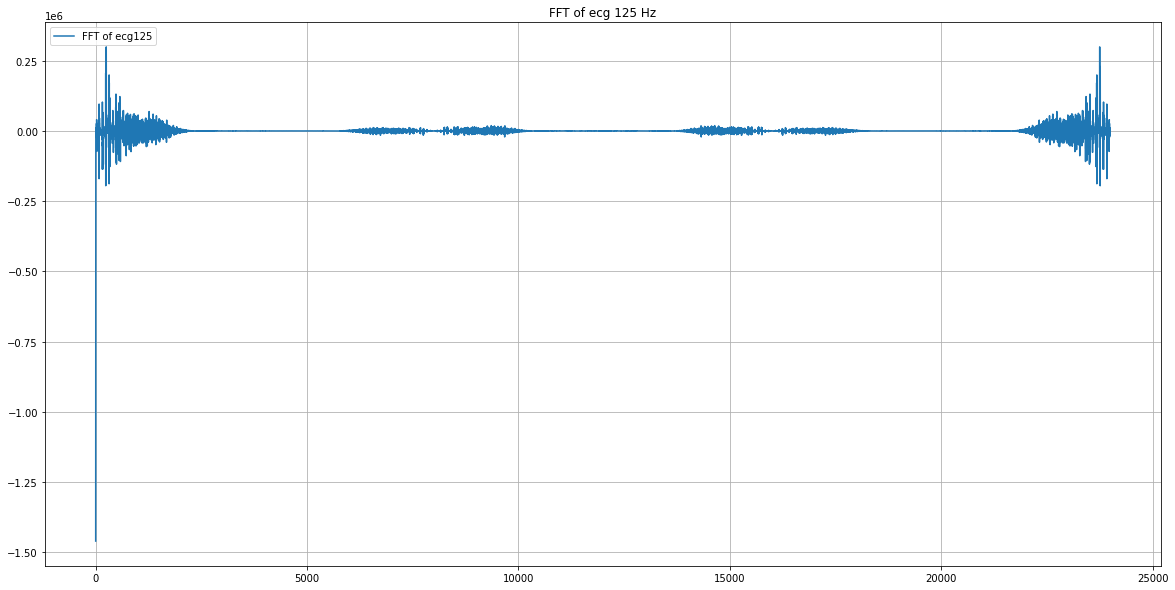

In [17]:
# By the following FFT algorithm, we can see noises in the middle of FFT plot 

f_125 = fft(resample_125)

plt.figure(figsize=(20,10))
plt.plot(f_125)
plt.legend(('FFT of ecg125', ' '), loc='upper left')
plt.title("FFT of ecg 125 Hz")
plt.grid(True)
plt.show()

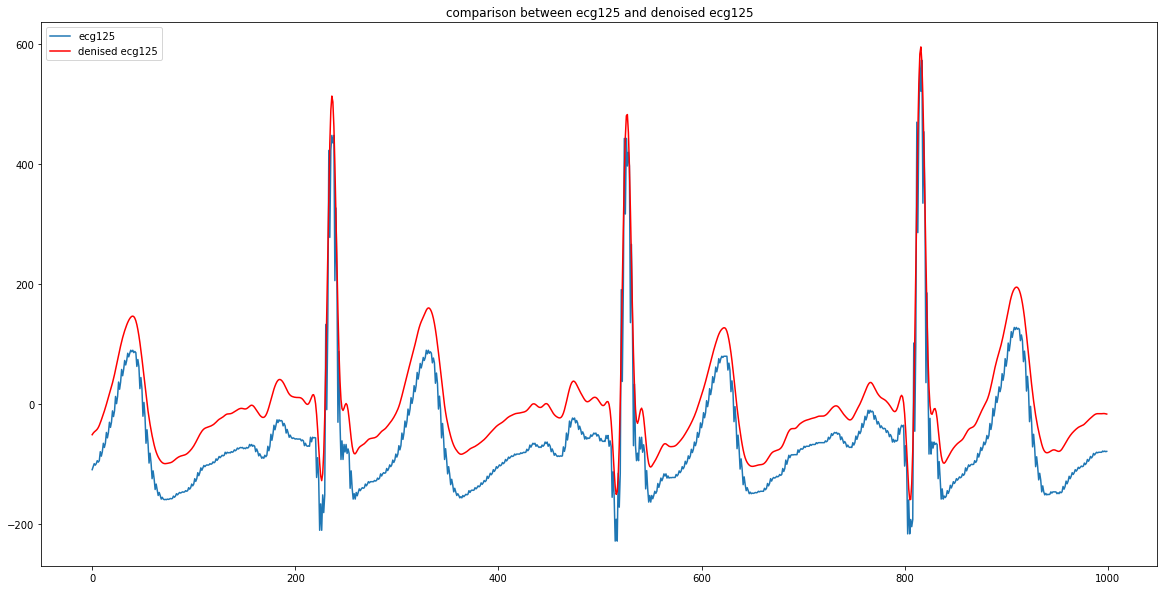

################################################################################################################################################
################################################################################################################################################


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


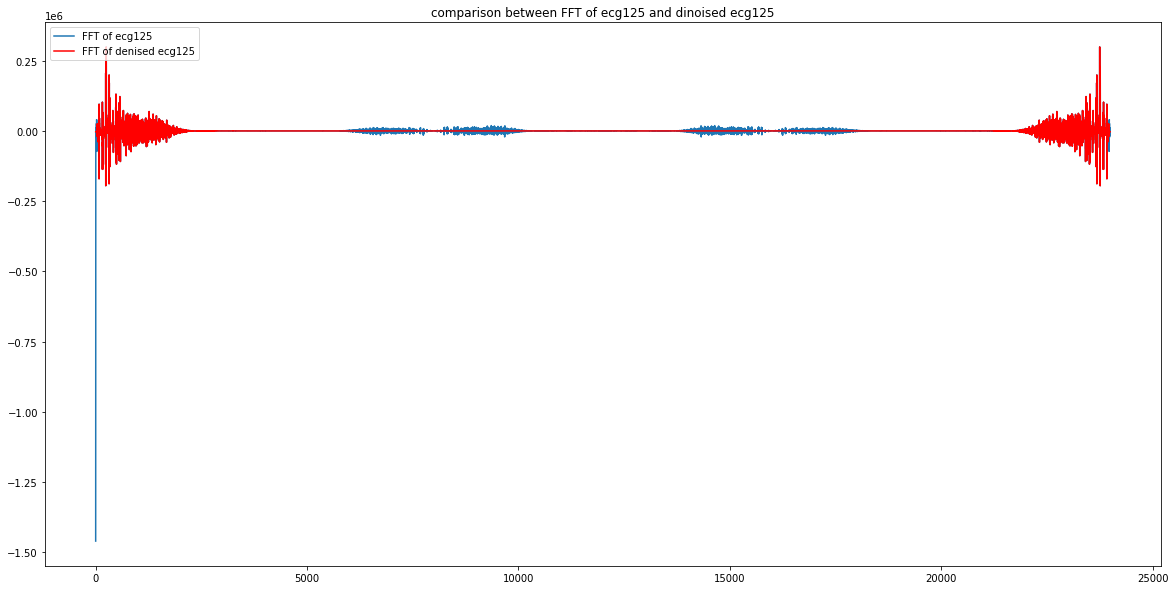

In [18]:
# In the beginning of denoising by a basic filter, we have to compute several parameters such as nyquist_rate, Sampling_rate, and cutoff normalize rate.
# Additionally, The band pass filter is suitable for deleting powerline interference(high frequency noise) and  baseline wander(low frequency noise). Additionaly, baselibe wander is related to low frequincy noises which are
# depends on environmental factors such as muscle tremors, high sensitivity of lids, and stress.
# All in all, the band pass filter tries to remove both high-frequency noises around 50 or 60 Hz and low-frequency noises around 0.5 Hz.

fs = 400
low_cut = 0.5
high_cut = 60
nyq = 0.5 * fs
low = low_cut/nyq
high = high_cut/nyq

b, a = signal.butter(5, [low, high], btype='band', analog=False)
filt_restingecg_125 = signal.filtfilt(b, a, resample_125) 

plt.figure(figsize=(20,10))
plt.plot(resample_125[(len(resample_125)-1000):])
plt.plot(filt_restingecg_125[(len(resample_125)-1000):],color='red')
plt.legend(('ecg125', 'denised ecg125'), loc='upper left')
plt.title("comparison between ecg125 and denoised ecg125")
plt.show()
print('################################################################################################################################################')
print('################################################################################################################################################')
# Comparison between FFT of resampled ECG 125 Hz to 200 Hz and its denoised 
f_125_denoised = fft(filt_restingecg_125)
plt.figure(figsize=(20,10))
plt.plot(f_125)
plt.plot(f_125_denoised,color='red')
plt.legend(('FFT of ecg125', 'FFT of denised ecg125'), loc='upper left')
plt.title("comparison between FFT of ecg125 and dinoised ecg125")
plt.show()

PEAKS DETECTION

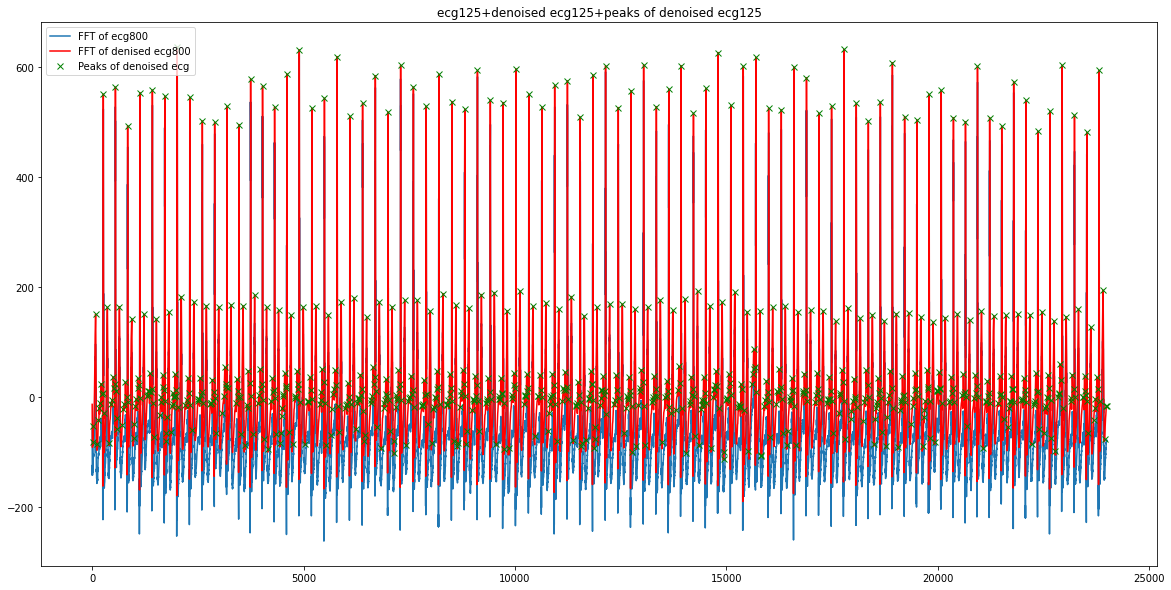

###################################################################################################################################################
###################################################################################################################################################


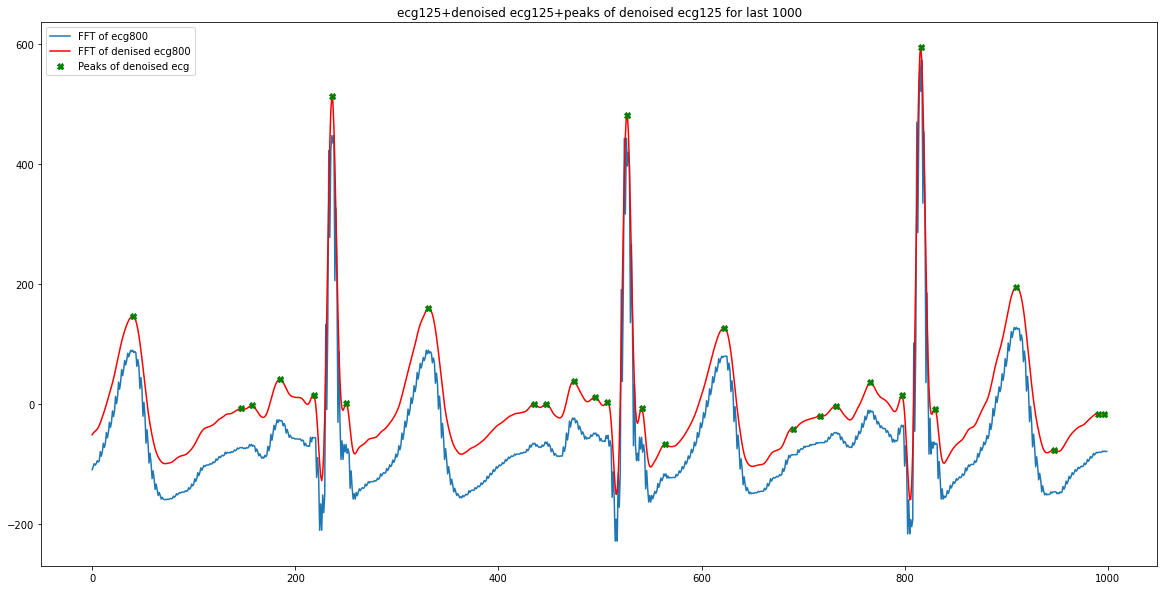

###################################################################################################################################################
###################################################################################################################################################


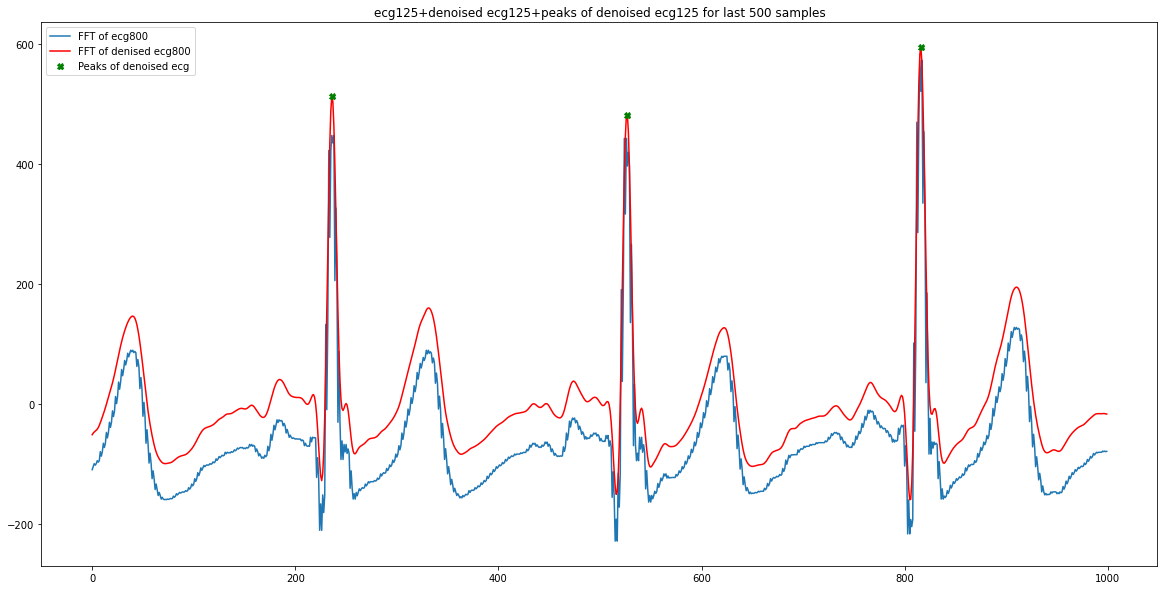

In [19]:
# Finding all peaks of filtered and resampled ECG 125 Hz. There are a number of Peaks and local peaks at the diagram. 

Peaks_125,_ = signal.find_peaks(filt_restingecg_125)

plt.figure(figsize=(20,10))
plt.plot(resample_125)
plt.plot(filt_restingecg_125,color='red')
plt.plot(Peaks_125, filt_restingecg_125[Peaks_125], "x",color='green')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg125+denoised ecg125+peaks of denoised ecg125")
plt.show()

print('###################################################################################################################################################')
print('###################################################################################################################################################')
# finding peaks for only last 1000 samples of filtered and resampled ECG 125 Hz
filt_restingecg_125_part = filt_restingecg_125[(len(resample_125)-1000):]
Peaks_125_part,_ = signal.find_peaks(filt_restingecg_125_part)

plt.figure(figsize=(20,10))
plt.plot(resample_125[(len(resample_125)-1000):])
plt.plot(filt_restingecg_125[(len(resample_125)-1000):],color='red')
plt.plot(Peaks_125_part, filt_restingecg_125_part[Peaks_125_part], "X",color='green')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg125+denoised ecg125+peaks of denoised ecg125 for last 1000")
plt.show()
print('###################################################################################################################################################')
print('###################################################################################################################################################')
# We tried to find peaks on the last 1000 samples. Therefore, we pout local peaks out, by using a threshold at the top of the local peaks.
filt_restingecg_125_part = filt_restingecg_125[(len(resample_125)-1000):]
Peaks_125_part,_ = signal.find_peaks(filt_restingecg_125_part, height=200)

plt.figure(figsize=(20,10))
plt.plot(resample_125[(len(resample_125)-1000):])
plt.plot(filt_restingecg_125[(len(resample_125)-1000):],color='red')
plt.plot(Peaks_125_part, filt_restingecg_125_part[Peaks_125_part], "X",color='green')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg125+denoised ecg125+peaks of denoised ecg125 for last 500 samples")
plt.show()

# **All Three tasks for ECG 800 Hz**

**RESAMPLING**

Since there are two separate ECG data by 125 and 800 Hz, respectively, for resampling to 200 Hz, we have to use downsampling and upsampling, respectively.

[2421.5        2241.         2396.25       ... 6303.5        6369.75
 5241.75716463]
################################################################################################################################################
################################################################################################################################################


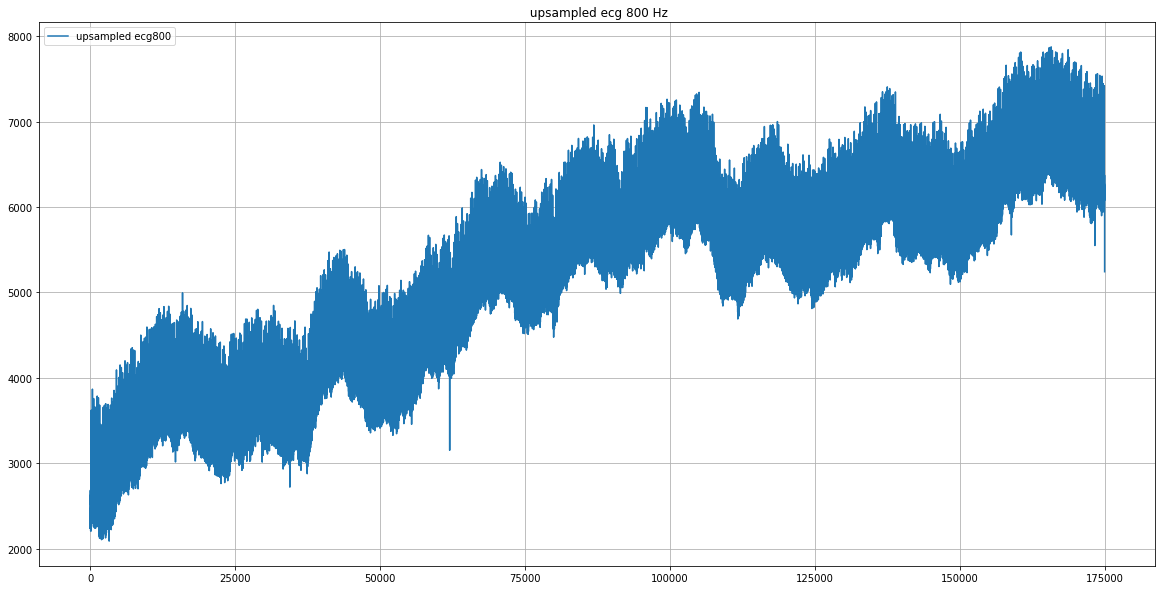

In [20]:
# I used a particular averaging technique to downsample the ECG from 800 Hz to 200 Hz.  I averaged every four continuing samples and added their average to a new list to resample the ECG.
# Therefore, I continued this method until the size of the new list was equal to the required samples of 200 Hz ECG. 

resample_800 = block_reduce(my_ecg_800, block_size=(4,), func=np.mean, cval=np.mean(my_ecg_800))
print(resample_800)
print('################################################################################################################################################')
print('################################################################################################################################################')
plt.figure(figsize=(20,10))
plt.plot(resample_800)
plt.legend(('upsampled ecg800', ' '), loc='upper left')
plt.title(" upsampled ecg 800 Hz")
plt.grid(True)
plt.show()

***Filtering***

FFT is a suitable algorithm to find noises at ECG to convert the ECG to the frequency domain to diagnosis noisy parts of the ECG

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


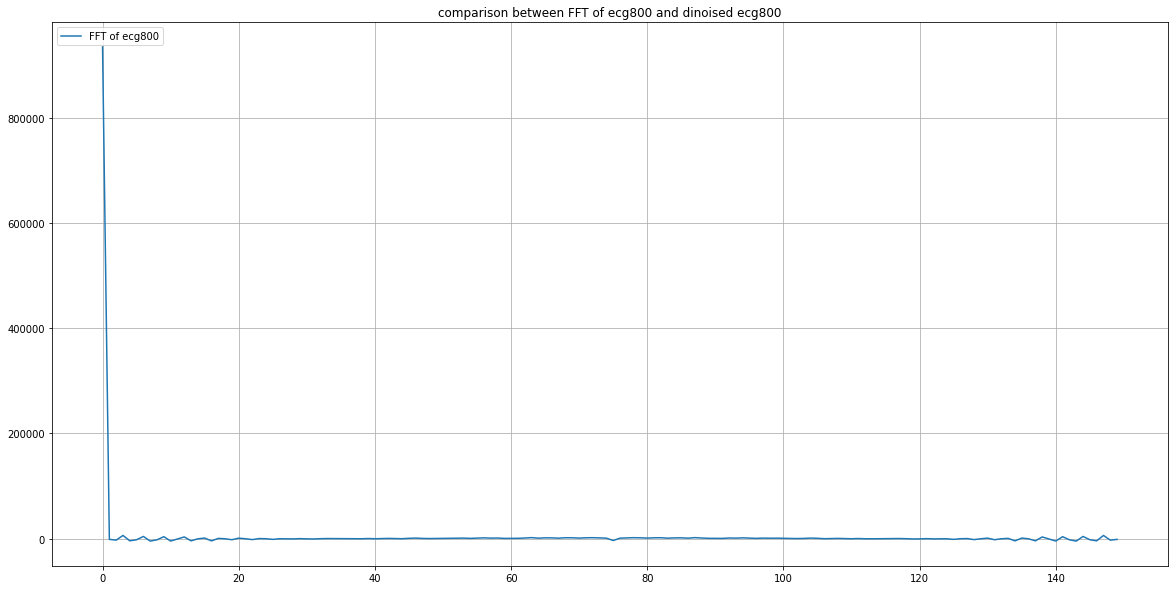

In [21]:
# By the following FFT algorithm, we can see noises in the middle of FFT plot. I computed FFT for last 150 samples resampled. 
resample_800_part = resample_800[(len(resample_800)-150):]

f_800 = fft(resample_800_part)

plt.figure(figsize=(20,10))
plt.plot(f_800)
plt.legend(('FFT of ecg800', ' '), loc='upper left')
plt.title("comparison between FFT of ecg800 and dinoised ecg800")
plt.grid(True)
plt.show()

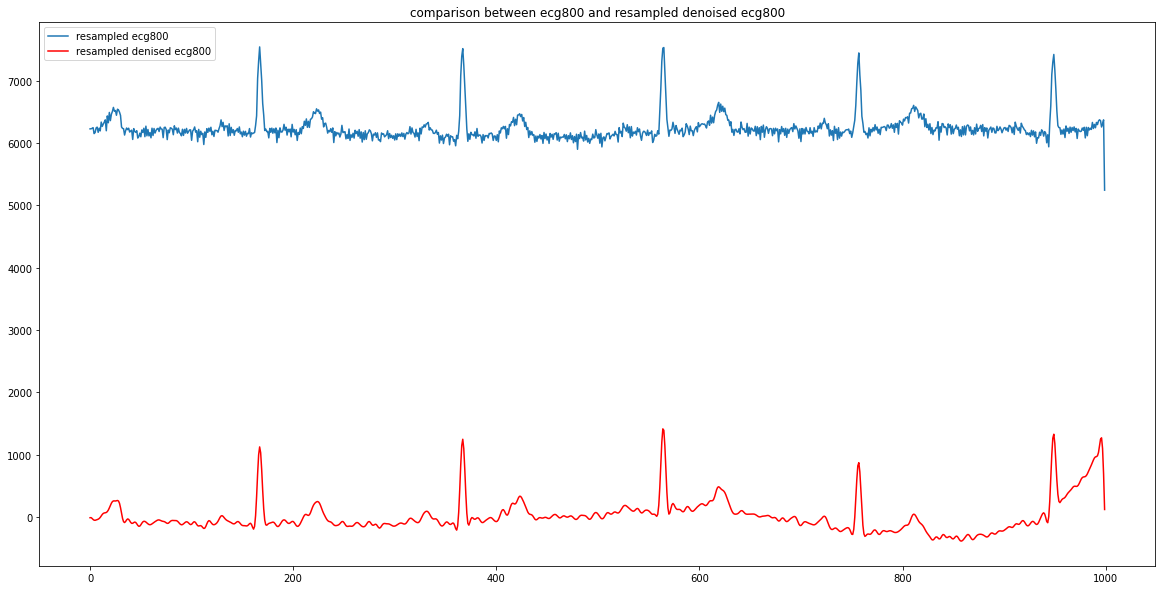

################################################################################################################################################
################################################################################################################################################


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


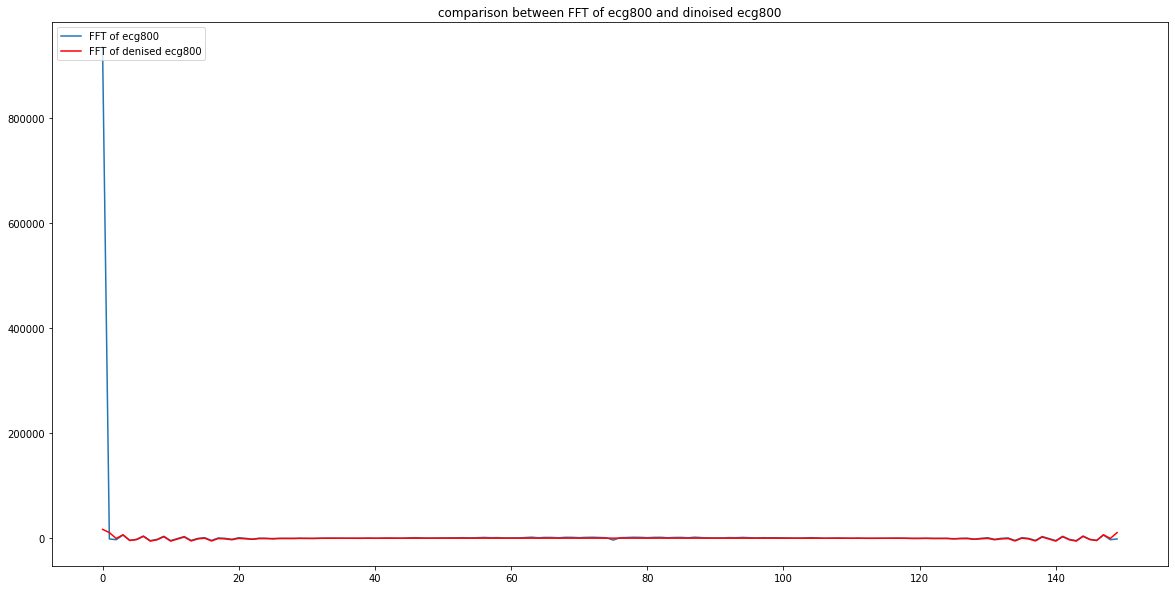

In [22]:
# In the beginning of denoising by a basic filter, we have to calculate several parameters such as nyquist_rate, Sampling_rate, and cutoff normalize rate.
# Additionally, The low pass filter is suitable for deleting high frequincy noises. Additionaly, baselibe wander is related to low frequincy noises which are
# depends on environmental factors such as muscle tremors, high sensitivity of leds, and stress. I plotted for last 1000 samples resampled.

fs = 400
low_cut = 0.5
high_cut = 60
nyq = 0.5 * fs
low = low_cut/nyq
high = high_cut/nyq

b, a = signal.butter(5, [low, high], btype='band', analog=False)
filt_restingecg_800 = signal.filtfilt(b, a, resample_800)

plt.figure(figsize=(20,10))
plt.plot(resample_800[(len(resample_800)-1000):])
plt.plot(filt_restingecg_800[(len(resample_800)-1000):],color='red')
plt.legend(('resampled ecg800', 'resampled denised ecg800'), loc='upper left')
plt.title("comparison between ecg800 and resampled denoised ecg800")
plt.show()
print('################################################################################################################################################')
print('################################################################################################################################################')
# Comparison between FFT of resampled ECG 125 Hz to 200 Hz and its denoised 
f_800_denoised = fft(filt_restingecg_800[(len(resample_800)-150):])

plt.figure(figsize=(20,10))
plt.plot(f_800)
plt.plot(f_800_denoised,color='red')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800'), loc='upper left')
plt.title("comparison between FFT of ecg800 and dinoised ecg800")
plt.show()

**Peaks Finder**

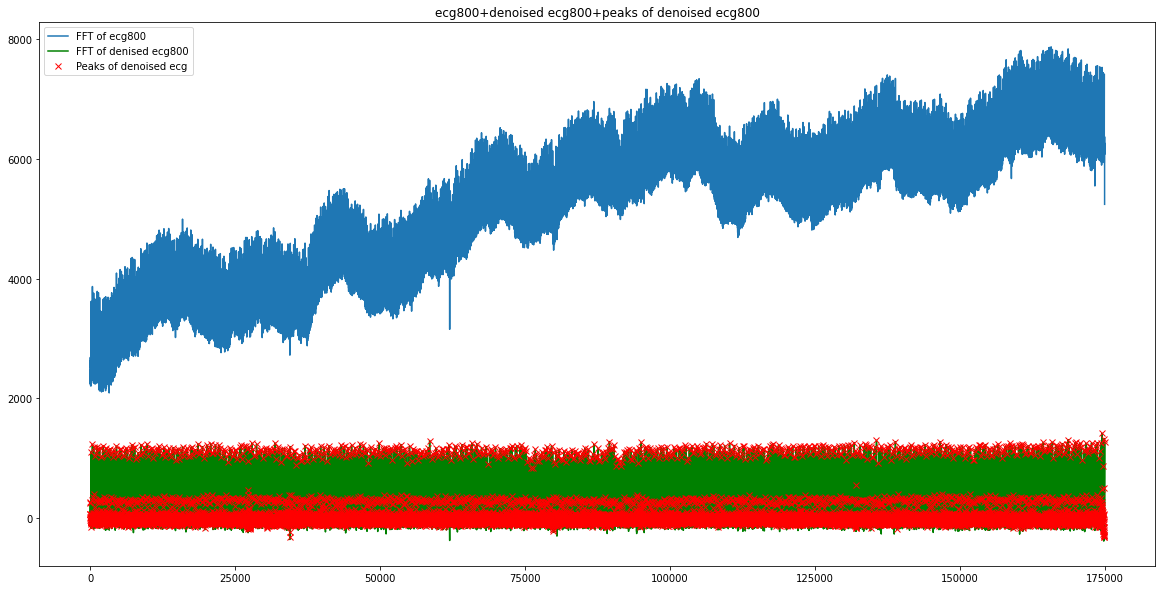

###################################################################################################################################################
###################################################################################################################################################


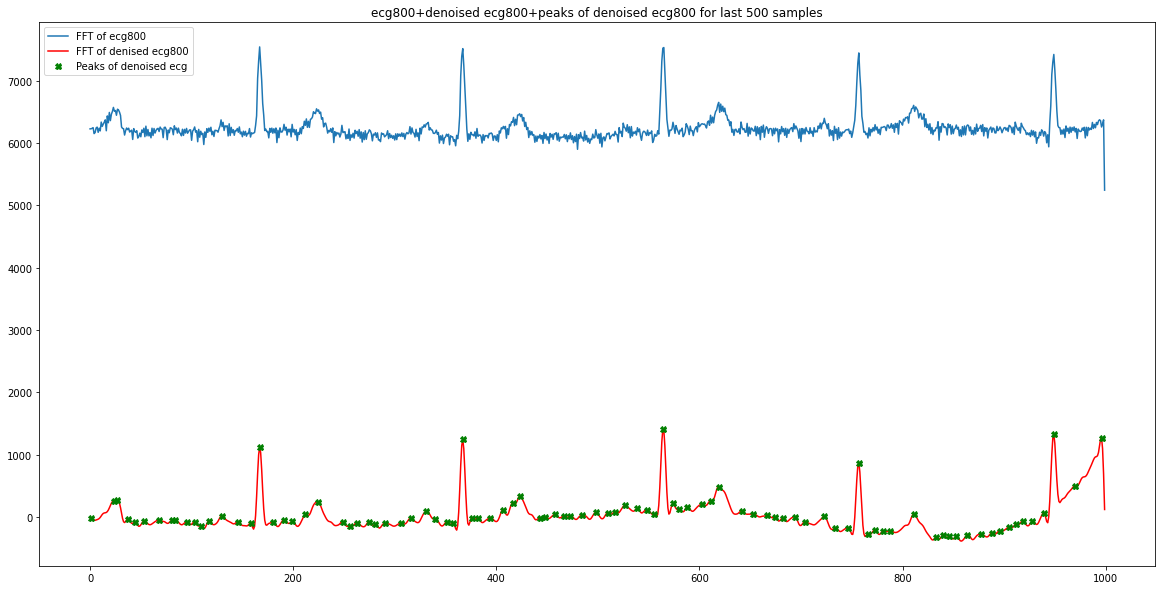

###################################################################################################################################################
###################################################################################################################################################


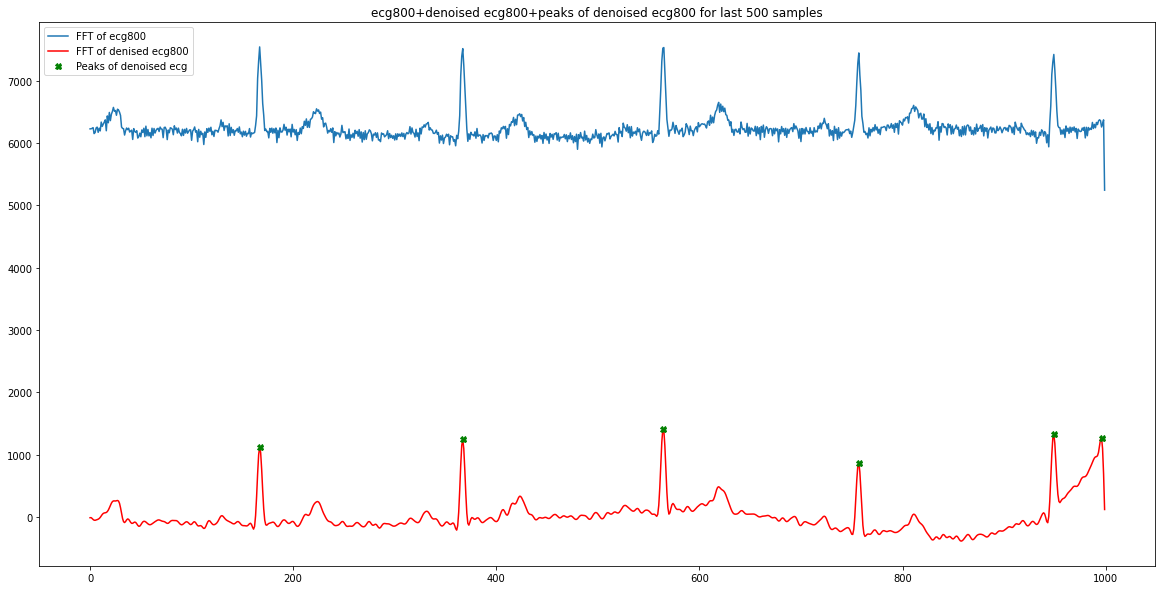

In [23]:
# Finding all peaks of filtered and resampled ECG 125 Hz. There are a number of Peaks and local peaks at the diagram. 
Peaks_800,_ = signal.find_peaks(filt_restingecg_800)

plt.figure(figsize=(20,10))
plt.plot(resample_800)
plt.plot(filt_restingecg_800,color='green')
plt.plot(Peaks_800, filt_restingecg_800[Peaks_800], "x",color='red')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg800+denoised ecg800+peaks of denoised ecg800")
plt.show()

print('###################################################################################################################################################')
print('###################################################################################################################################################')
# finding peaks for only last 1000 samples of filtered and resampled ECG 125 Hz
filt_restingecg_800_part = filt_restingecg_800[(len(resample_800)-1000):]
Peaks_800_part,_ = signal.find_peaks(filt_restingecg_800_part)

plt.figure(figsize=(20,10))
plt.plot(resample_800[(len(resample_800)-1000):])
plt.plot(filt_restingecg_800[(len(resample_800)-1000):],color='red')
plt.plot(Peaks_800_part, filt_restingecg_800_part[Peaks_800_part], "X", color='green')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg800+denoised ecg800+peaks of denoised ecg800 for last 500 samples")
plt.show()

# We tried to find peaks on the last 1000 samples. Therefore, we pout local peaks out, by using a threshold at the top of the local peaks.
filt_restingecg_800_part = filt_restingecg_800[(len(resample_800)-1000):]
Peaks_800_part,_ = signal.find_peaks(filt_restingecg_800_part, height=800)
print('###################################################################################################################################################')
print('###################################################################################################################################################')
plt.figure(figsize=(20,10))
plt.plot(resample_800[(len(resample_800)-1000):])
plt.plot(filt_restingecg_800[(len(resample_800)-1000):],color='red')
plt.plot(Peaks_800_part, filt_restingecg_800_part[Peaks_800_part], "X", color='green')
plt.legend(('FFT of ecg800', 'FFT of denised ecg800', 'Peaks of denoised ecg'), loc='upper left')
plt.title("ecg800+denoised ecg800+peaks of denoised ecg800 for last 500 samples")
plt.show()